In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [7]:
df = pd.read_csv(r"C:\Users\deepa\Downloads\loan_approval_dataset.csv")

In [9]:
df.head()

,Applicant_ID,Age,Gender,Education,Employment_Type,Annual_Income,Credit_Score,Loan_Amount,Loan_Term,Loan_Status
0,A001,25,Male,Graduate,Salaried,300000,720,200000,36,Approved
1,A002,32,Female,Graduate,Self_Employed,450000,680,250000,48,Approved
2,A003,45,Male,Not Graduate,Salaried,280000,590,180000,24,Rejected
3,A004,29,Female,Graduate,Salaried,500000,760,300000,60,Approved
4,A005,40,Male,Graduate,Self_Employed,350000,610,220000,36,Rejected


In [11]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (15, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Applicant_ID     15 non-null     object
 1   Age              15 non-null     int64 
 2   Gender           15 non-null     object
 3   Education        15 non-null     object
 4   Employment_Type  15 non-null     object
 5   Annual_Income    15 non-null     int64 
 6   Credit_Score     15 non-null     int64 
 7   Loan_Amount      15 non-null     int64 
 8   Loan_Term        15 non-null     int64 
 9   Loan_Status      15 non-null     object
dtypes: int64(5), object(5)
memory usage: 1.3+ KB


In [13]:
df.describe()

,Age,Annual_Income,Credit_Score,Loan_Amount,Loan_Term
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,36.133333,417333.333333,680.000000,245333.333333,43.200000
std,8.492574,131771.808532,79.011753,71899.400620,14.905416
min,25.000000,240000.000000,560.000000,140000.000000,24.000000
25%,29.500000,305000.000000,605.000000,200000.000000,36.000000
50%,35.000000,420000.000000,690.000000,230000.000000,36.000000
75%,42.000000,490000.000000,730.000000,290000.000000,54.000000
max,52.000000,700000.000000,810.000000,400000.000000,72.000000


In [15]:
df.describe(include='object')


,Applicant_ID,Gender,Education,Employment_Type,Loan_Status
count,15,15,15,15,15
unique,15,2,2,2,2
top,A001,Male,Graduate,Salaried,Approved
freq,1,8,11,11,10


In [17]:
df.isnull().sum()

Applicant_ID       0
Age                0
Gender             0
Education          0
Employment_Type    0
Annual_Income      0
Credit_Score       0
Loan_Amount        0
Loan_Term          0
Loan_Status        0
dtype: int64

In [19]:
df.duplicated().sum()

0

In [21]:
df = df.drop_duplicates()

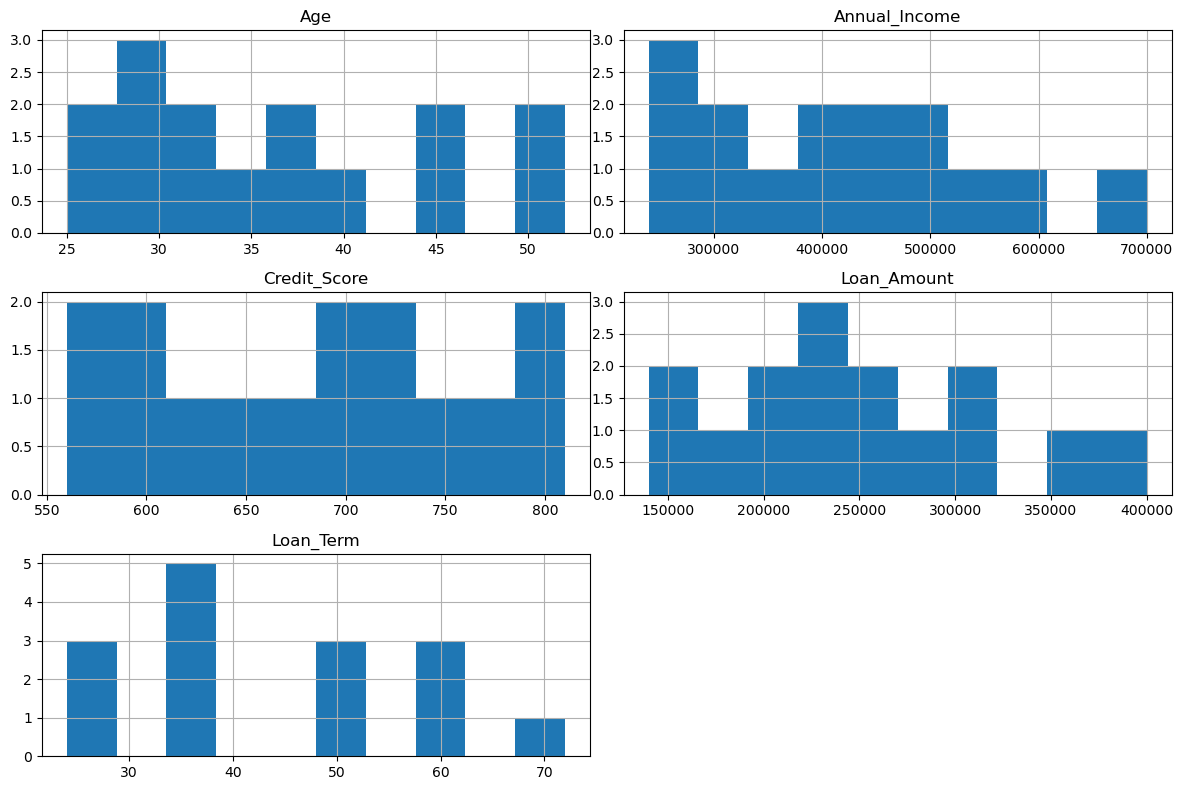

In [23]:
df.select_dtypes(include=np.number).hist(figsize=(12,8))
plt.tight_layout()
plt.show()


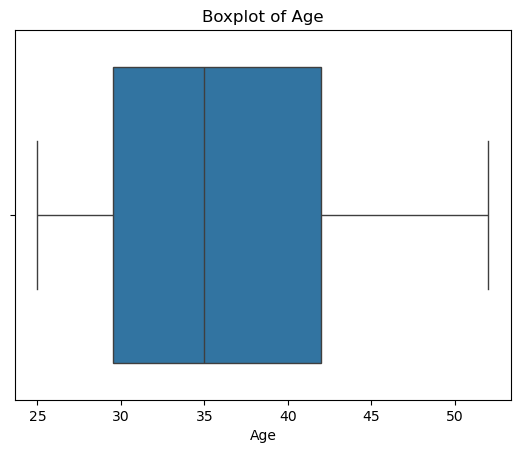

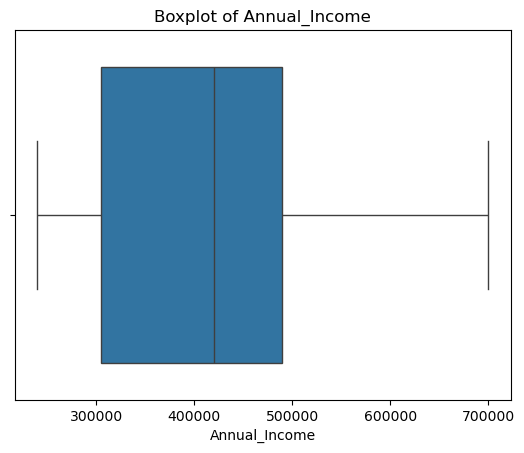

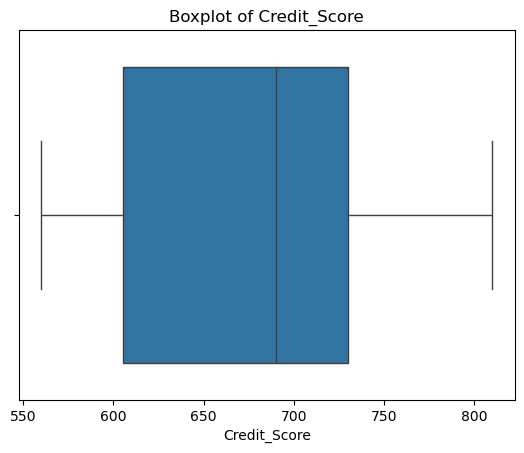

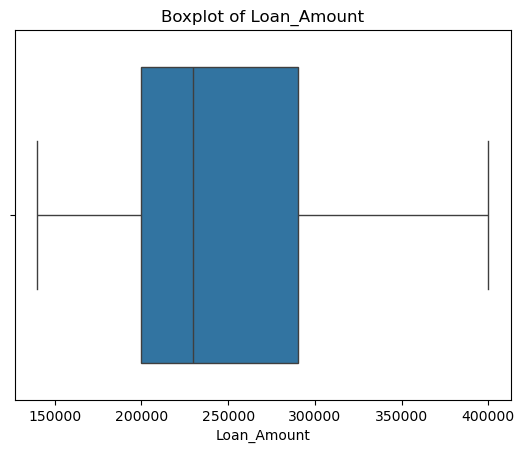

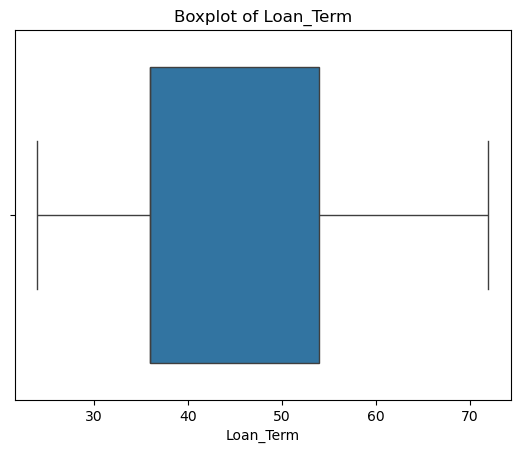

In [25]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

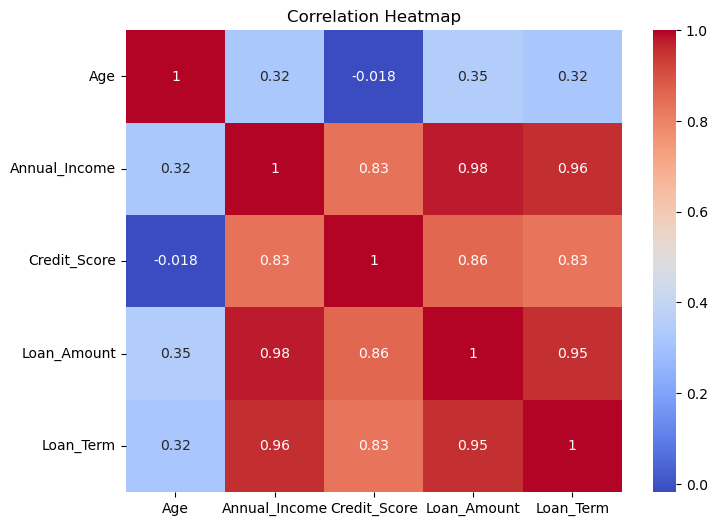

In [27]:
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


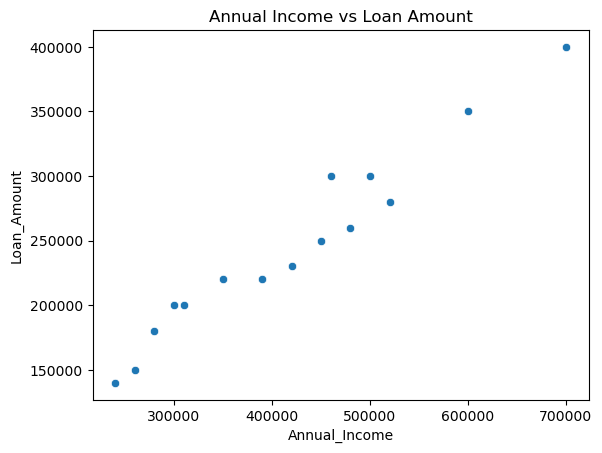

In [29]:
sns.scatterplot(x="Annual_Income", y="Loan_Amount", data=df)
plt.title("Annual Income vs Loan Amount")
plt.show()

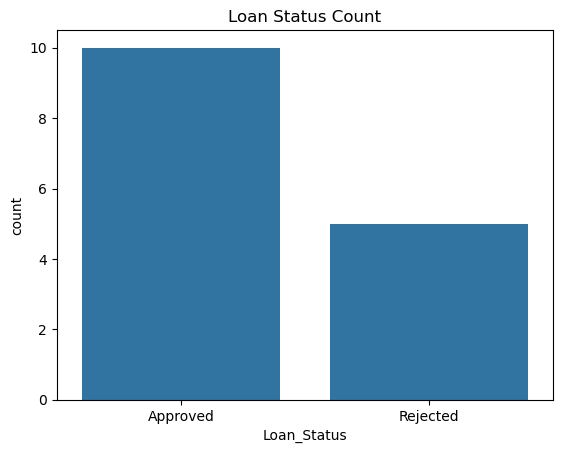

In [31]:
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status Count")
plt.show()

In [33]:
approved = df[df["Loan_Status"] == "Approved"]["Credit_Score"]
rejected = df[df["Loan_Status"] == "Rejected"]["Credit_Score"]

print("Average Credit Score (Approved):", approved.mean())
print("Average Credit Score (Rejected):", rejected.mean())

Average Credit Score (Approved): 726.0
Average Credit Score (Rejected): 588.0


In [35]:
df.select_dtypes(include=np.number).skew()

Age              0.595822
Annual_Income    0.556413
Credit_Score     0.009023
Loan_Amount      0.594652
Loan_Term        0.381895
dtype: float64

In [37]:
print("Numerical Columns:", list(df.select_dtypes(include=np.number).columns))
print("Categorical Columns:", list(df.select_dtypes(include='object').columns))

Numerical Columns: ['Age', 'Annual_Income', 'Credit_Score', 'Loan_Amount', 'Loan_Term']
Categorical Columns: ['Applicant_ID', 'Gender', 'Education', 'Employment_Type', 'Loan_Status']
